#### Business Analytics FHDW 2025
# Ein erstes kleines Beispiel zur logistischen Regression
## zur Illustration praktischer Aspekte

Wir betrachten den bekannten Datensatz *UniversalBank.csv* und führen damit eine einfache logistische Regression durch. Sie soll auf Basis des Einkommens voraussagen, ob ein Kunde/eine Kundin ein Angebot über ein Darlehen annehmen würde.

Zunächst bereiten wir den Datensatz auf die bereits bekannte Weise vor.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt

from dmba import classificationSummary

bank_df = pd.read_csv('./Daten/UniversalBank.csv')
print(bank_df.head)

y = bank_df['PersonalLoan']
X = bank_df[['Income']]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

<bound method NDFrame.head of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  PersonalLoan  SecuritiesAccount  CDAccount  Online  C

Die Durchführung der logistischen Regression über die Anpassung an die Trainingsdaten mit `fit` ist dann auch gewohnt einfach:

In [2]:
lr = LogisticRegression()
lr.fit(train_X, train_y)

LogisticRegression()

Wir konstruieren uns daraus einmal selbst die Funktion zur Bestimmung der bedingten Wahrscheinlichkeiten. Wir nutzen nur einen Prädiktor, also haben wir $p(loan = yes | income = x) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x)}}$.

In [3]:
intercept = lr.intercept_[0]
coeff = lr.coef_[0][0]

x = np.arange(0, 250, 1) # Skaliert auf Basis der Einkommensspanne
P = 1/(1+np.exp(-1*(intercept+coeff*x)))

print(intercept, coeff)

-6.062680137865386 0.036438813180591514


Für die gesuchten Betas greifen wir auf die Attribute der `LogisticRegression` zu. $\beta_0$ finden wir in `intercept_`, $\beta_1$ in `coef_`. Unsere angepasste Funktion ist dann $p(loan = yes | income = x) = \frac{1}{1+e^{6.063 - 0.036 x}}$. Werfen wir einen Blick darauf, zusammen mit den Darlehensentscheidungen aus dem Datensatz:

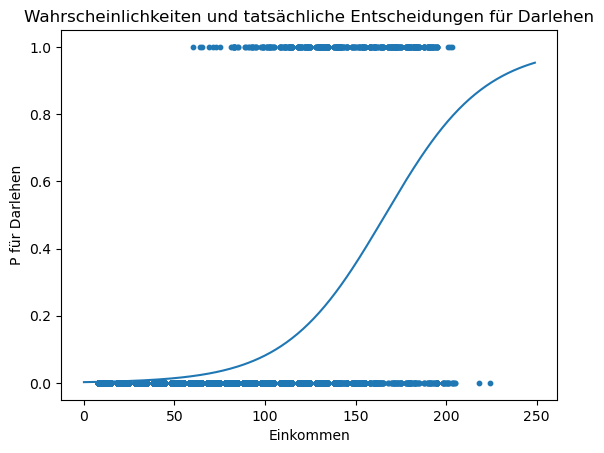

In [4]:
plt.plot(x,P)
plt.scatter(bank_df['Income'], bank_df['PersonalLoan'], s=10)
plt.title('Wahrscheinlichkeiten und tatsächliche Entscheidungen für Darlehen')
plt.xlabel('Einkommen')
plt.ylabel('P für Darlehen')
plt.show()

Als Chancen bzw. Odds können wir das auch darstellen:

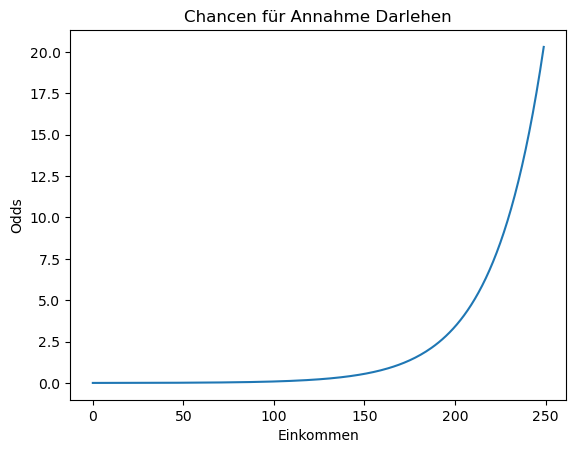

In [5]:
Odds = np.exp(intercept+coeff*x)
       
plt.plot(x,Odds)
plt.title('Chancen für Annahme Darlehen')
plt.xlabel('Einkommen')
plt.ylabel('Odds')
plt.show()

Bis jetzt haben wir uns mit den bedingten Wahrscheinlichkeiten beschäftigt. Ursprünglich wollen wir mit der logistischen Regression aber eine binäre Prognose erhalten, in diesem Fall *Darlehen ja oder nein*. Dazu können wir wieder die Funktion `predict` nutzen. Für die Beurteilung der Performance nutzen wir hier eine Konfusionsmatrix, jeweils für die Trainings- und die Validierungsdaten.

In [6]:
classificationSummary(train_y, lr.predict(train_X))
print('')
classificationSummary(valid_y, lr.predict(valid_X))

Confusion Matrix (Accuracy 0.9080)

       Prediction
Actual    0    1
     0 2632   81
     1  195   92

Confusion Matrix (Accuracy 0.9110)

       Prediction
Actual    0    1
     0 1763   44
     1  134   59


Um aus den Wahrscheinlichkeiten zur binären Entscheidung zu kommen, wendet die Funktion eine Schwelle bzw. den *cutoff* $c$ an. Liegt die prognostizierte Wahrscheinlichkeit eines Datensatzes auf oder über $c$, wird angenommen, dass der Kunde/die Kundin das Darlehen akzeptiert, also Ereignis $1$ eintritt, sonst $0$. Im Falle der hier genutzten Funktion `predict` von *scikit learn* besitzt $c$ einen *default*-Wert von $0.5$. Überprüfen wir das kurz selbst:

In [7]:
train_predictions = np.where(P[train_X] >= 0.5, 1, 0)
valid_predictions = np.where(P[valid_X] >= 0.5, 1, 0)
classificationSummary(train_y, train_predictions)
print('')
classificationSummary(valid_y, valid_predictions)

Confusion Matrix (Accuracy 0.9080)

       Prediction
Actual    0    1
     0 2632   81
     1  195   92

Confusion Matrix (Accuracy 0.9110)

       Prediction
Actual    0    1
     0 1763   44
     1  134   59


Und noch eine Darstellung der ermittelten Wahrscheinlichkeitsfunktion und der Prädiktionen der Trainingsdatensätze:

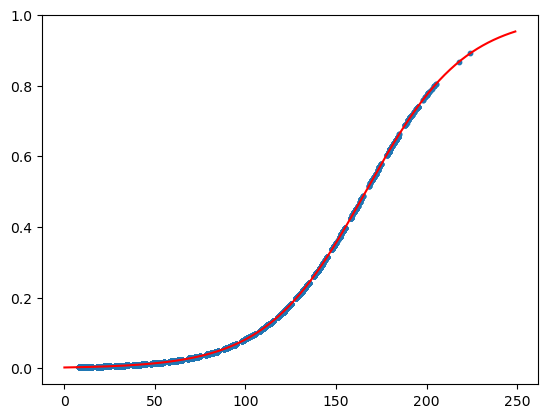

In [8]:
plt.plot(x, P, color='r')
plt.scatter(train_X['Income'], lr.predict_proba(train_X)[:,1], s=10)
plt.show()

## Aufgabe
Analysieren Sie die Auswirkungen verschiedener *cutoff*-Werte im gegebenen Modell auf geeignete Weise: Generieren Sie einen `scatter`-Graphen mit *cutoff*-Werten auf der x-Achse und der resultierenden Genauigkeit auf der y-Achse. `accuracy_score` von *scikit learn* kann dabei hilfreich sein.